In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2019-12-27 07:18:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  35.4MB/s    in 1.8s    

2019-12-27 07:18:14 (35.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



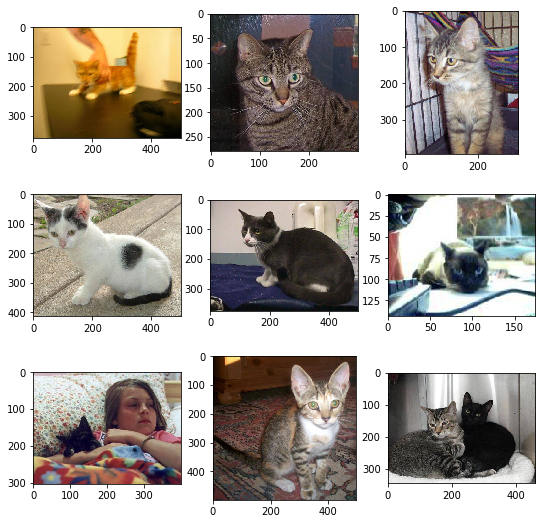

In [0]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
pyplot.figure(figsize=(9,9))
# define location of dataset
# plot few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = train_cats_dir + '/cat.'+ str(i) +'.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure

pyplot.show()

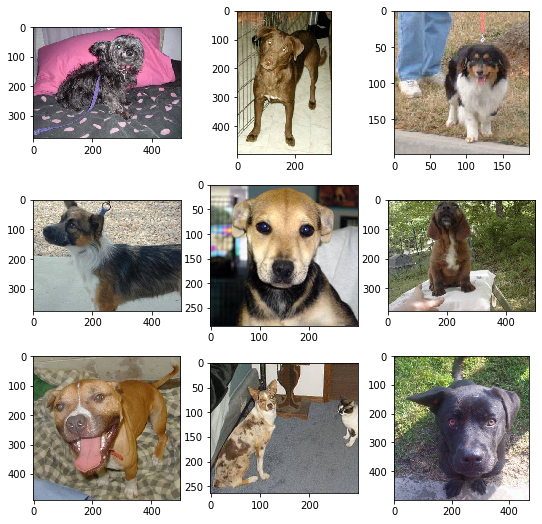

In [0]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
pyplot.figure(figsize=(9,9))
# define location of dataset
# plot few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = train_dogs_dir + '/dog.'+ str(i) +'.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure

pyplot.show()

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 - 15s - loss: 0.6911 - acc: 0.5435 - val_loss: 0.6723 - val_acc: 0.6250
Epoch 2/50
100/100 - 8s - loss: 0.6627 - acc: 0.6020 - val_loss: 0.6741 - val_acc: 0.5650
Epoch 3/50
100/100 - 8s - loss: 0.6204 - acc: 0.6565 - val_loss: 0.6107 - val_acc: 0.6540
Epoch 4/50
100/100 - 8s - loss: 0.5739 - acc: 0.7030 - val_loss: 0.5824 - val_acc: 0.7000
Epoch 5/50
100/100 - 8s - loss: 0.5382 - acc: 0.7340 - val_loss: 0.5640 - val_acc: 0.7140
Epoch 6/50
100/100 - 8s - loss: 0.5074 - acc: 0.7520 - val_loss: 0.5688 - val_acc: 0.6980
Epoch 7/50
100/100 - 8s - loss: 0.4842 - acc: 0.7595 - val_loss: 0.5483 - val_acc: 0.7110
Epoch 8/50
100/100 - 8s - loss: 0.4548 - acc: 0.7880 - val_loss: 0.5391 - val_acc: 0.7290
Epoch 9/50
100/100 - 8s - loss: 0.4239 - acc: 0.8050 - val_loss: 0.5885 - val_acc: 0.7010
Epoch 10/50
100/100 - 8s - loss: 0.4062 - acc: 0.8080 - val_loss: 0.5606 - val_acc: 0.7090
Epoch 11/50
10

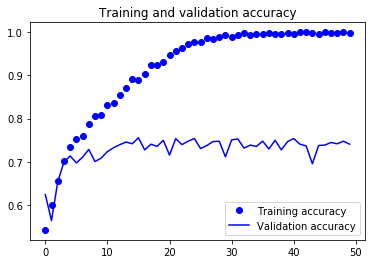

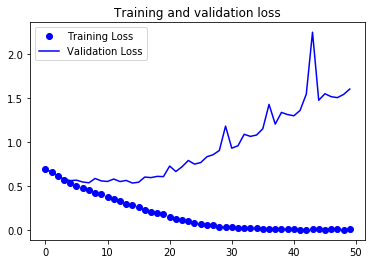

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code where we've added Image Augmentation. Run it to see the impact.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 - 18s - loss: 0.6939 - acc: 0.5280 - val_loss: 0.6837 - val_acc: 0.5560
Epoch 2/50
100/100 - 15s - loss: 0.6818 - acc: 0.5630 - val_loss: 0.6540 - val_acc: 0.6090
Epoch 3/50
100/100 - 16s - loss: 0.6641 - acc: 0.6000 - val_loss: 0.6537 - val_acc: 0.5990
Epoch 4/50
100/100 - 16s - loss: 0.6506 - acc: 0.6155 - val_loss: 0.6058 - val_acc: 0.6840
Epoch 5/50
100/100 - 16s - loss: 0.6268 - acc: 0.6445 - val_loss: 0.5944 - val_acc: 0.6730
Epoch 6/50
100/100 - 16s - loss: 0.6112 - acc: 0.6555 - val_loss: 0.5652 - val_acc: 0.6950
Epoch 7/50
100/100 - 16s - loss: 0.6046 - acc: 0.6660 - val_loss: 0.5530 - val_acc: 0.7040
Epoch 8/50
100/100 - 16s - loss: 0.5942 - acc: 0.6840 - val_loss: 0.6318 - val_acc: 0.6350
Epoch 9/50
100/100 - 16s - loss: 0.5835 - acc: 0.6880 - val_loss: 0.5611 - val_acc: 0.7030
Epoch 10/50
100/100 - 16s - loss: 0.5827 - acc: 0.6900 - val_loss: 0.5265 - val_acc: 0.7410
Epoch

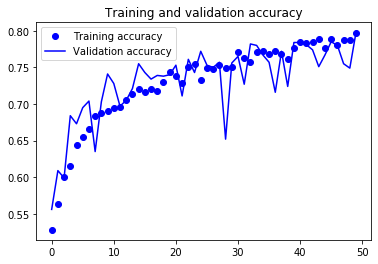

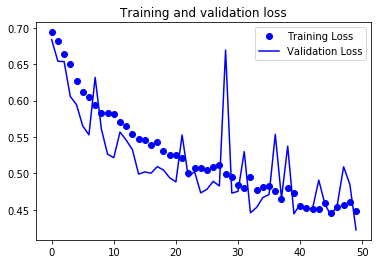

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Let's try to improve our model further by adding a dropout layer. This layer helps us to avoid our model from being overfitted.

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Convolution2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4), # added dropout layer for regularization
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5), # added dropout layer for regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
Epoch 1/100
100/100 - 22s - loss: 0.6980 - acc: 0.4870 - val_loss: 0.6902 - val_acc: 0.5210
Epoch 2/100
Epoch 1/100
100/100 - 15s - loss: 0.6904 - acc: 0.5270 - val_loss: 0.6741 - val_acc: 0.5780
Epoch 3/100
Epoch 1/100
100/100 - 15s - loss: 0.6793 - acc: 0.5730 - val_loss: 0.6639 - val_acc: 0.6120
Epoch 4/100
Epoch 1/100
100/100 - 15s - loss: 0.6677 - acc: 0.5855 - val_loss: 0.6495 - val_acc: 0.6150
Epoch 5/100
Epoch 1/100
100/100 - 15s - loss: 0.6630 - acc: 0.5955 - val_loss: 0.6420 - val_acc: 0.6360
Epoch 6/100
Epoch 1/100
100/100 - 15s - loss: 0.6512 - acc: 0.5975 - val_loss: 0.6365 - val_acc: 0.6520
Epoch 7/100
Epoch 1/100
100/100 - 15s - loss: 0.6458 - acc: 0.6215 - val_loss: 0.6089 - val_acc: 0.6590
Epoch 8/100
E

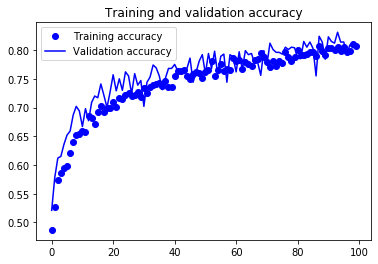

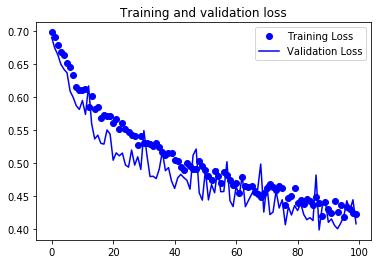

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


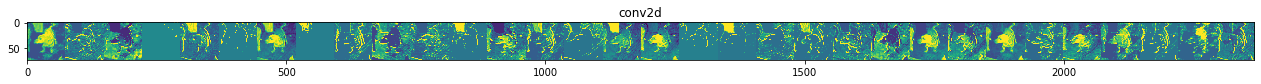

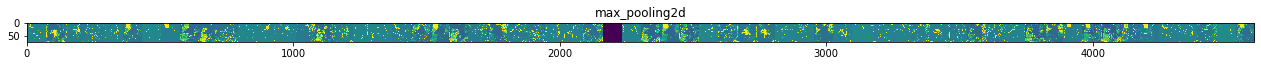

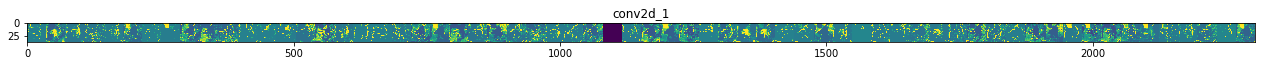

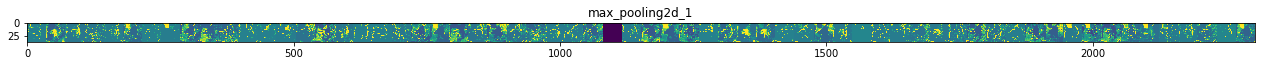

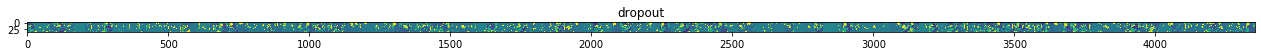

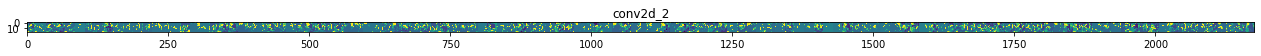

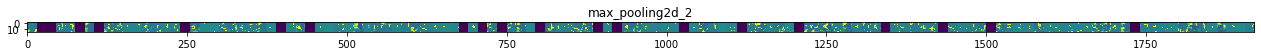

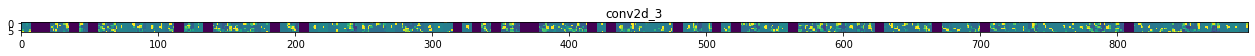

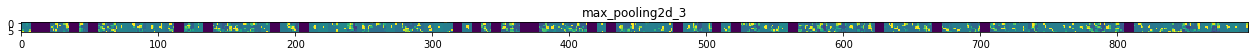

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img


train_cat_names = os.listdir(train_cats_dir)
train_dog_names = os.listdir(train_dogs_dir)
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_names]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_names]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 22. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

[[('n02123045', 'tabby', 0.5997719),
  ('n02124075', 'Egyptian_cat', 0.1412815),
  ('n02123159', 'tiger_cat', 0.1308038),
  ('n02127052', 'lynx', 0.05900412),
  ('n02123394', 'Persian_cat', 0.010853074)]]

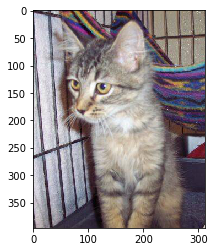

In [3]:
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'tmp')))

from vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

model = VGG16(include_top=True,weights='imagenet')
img_path = train_cats_dir + '/cat.2.jpg'

cat = imread(img_path)
pyplot.imshow(cat)

img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x)
decode_predictions(pred)

In [4]:
img_data_list=[]

for i in range(1000):
	img_path = train_cats_dir + '/cat.'+ str(i) +'.jpg'
	img = image.load_img(img_path, target_size=(224, 224))
	X_train = image.img_to_array(img)
	X_train = np.expand_dims(X_train, axis=0)
	X_train = preprocess_input(X_train)
	img_data_list.append(X_train)
 
for i in range(1000):
	img_path = train_dogs_dir + '/dog.'+ str(i) +'.jpg'
	img = image.load_img(img_path, target_size=(224, 224))
	X_train = image.img_to_array(img)
	X_train = np.expand_dims(X_train, axis=0)
	X_train = preprocess_input(X_train)
	img_data_list.append(X_train)

img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

# Define the number of classes
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:1000] = 0


names = ['cat','dog']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
X_train,y_train = shuffle(img_data,Y, random_state=2)


(2000, 1, 224, 224, 3)
(1, 2000, 224, 224, 3)
(2000, 224, 224, 3)


In [5]:

img_data_list1=[]

for i in range(2000,2500):
	img_path = validation_cats_dir + '/cat.'+ str(i) +'.jpg'
	img = image.load_img(img_path, target_size=(224, 224))
	X_test = image.img_to_array(img)
	X_test = np.expand_dims(X_test, axis=0)
	X_test = preprocess_input(X_test)
	img_data_list1.append(X_test)
 
for i in range(2000,2500):
	img_path = validation_dogs_dir + '/dog.'+ str(i) +'.jpg'
	img = image.load_img(img_path, target_size=(224, 224))
	X_test = image.img_to_array(img)
	X_test = np.expand_dims(X_test, axis=0)
	X_test = preprocess_input(X_test)
	img_data_list1.append(X_test)

img_data1 = np.array(img_data_list1)
#img_data = img_data.astype('float32')
print (img_data1.shape)
img_data1=np.rollaxis(img_data1,1,0)
print (img_data1.shape)
img_data1=img_data1[0]
print (img_data1.shape)

# Define the number of classes
num_classes = 2
num_of_samples = img_data1.shape[0]
labels1 = np.ones((num_of_samples,),dtype='int64')

labels1[0:500]=0

names = ['cat','dog']

# convert class labels to on-hot encoding
Y1 = np_utils.to_categorical(labels1, num_classes)
#Shuffle the dataset
X_test,y_test = shuffle(img_data1,Y1, random_state=2)

(1000, 1, 224, 224, 3)
(1, 1000, 224, 224, 3)
(1000, 224, 224, 3)


In [6]:
image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(2, activation='sigmoid', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)

# print(custom_vgg_model.layers[3].trainable) ==> True

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

# print(custom_vgg_model.layers[3].trainable) ==> False

custom_vgg_model.summary()

custom_vgg_model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
hist = custom_vgg_model.fit(X_train, y_train, batch_size=20, epochs=7, verbose=1, validation_data=(X_test, y_test))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)
print('----------------------------------------------------------------------------------------------------------------')
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 2000 samples, validate on 1000 samples
Epoch 1/7
2000/2000 [==============================] - 22s 11ms/step - loss: 0.0087 - acc: 0.9973 - val_loss: 0.0519 - val_acc: 0.9825
Epoch 2/7
2000/2000 [==============================] - 22s 11ms/step - loss: 0.0050 - acc: 0.9983 - val_loss: 0.0523 - val_acc: 0.9855
Epoch 3/7
2000/2000 [==============================] - 22s 11ms/step - loss: 0.0023 - acc: 0.9998 - val_loss: 0.0551 - val_acc: 0.9840
Epoch 4/7
2000/2000 [==============================] - 22s 11ms/step - loss: 9.9785e-04 - acc: 1.0000 - val_loss: 0.0615 - val_acc: 0.9870
Epoch 5/7
2000/2000 [==============================] - 22s 11ms/step - loss: 5.6701e-04 - acc: 1.0000 - val_loss: 0.0593 - val_acc: 0.9880
Epoch 6/7
2000/2000 [==============================] - 22s 11ms/step - loss: 4.8379e-04 - acc: 1.0000 - val_loss: 0.0610 - val_acc: 0.9880
Epoch 7/7
1000/1000 [==============================] - 9s 9ms/step
---------------------------------------------------------------